Analysis script for the binding of the LIR of NIX to WIPI2d - Jan Stuke, 31.03.2025

In [6]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from analysis_functions import *

LIR interactions - WT

In [7]:
#Inputs

gro1="../../01_Replica_1/03_EQ_prod/init.c_pbc.gro"
gro2="../../02_Replica_2/03_EQ_prod/init.c_pbc.gro"
gro3="../../03_Replica_3/03_EQ_prod/init.c_pbc.gro"

xtc1="../../01_Replica_1/03_EQ_prod/trjcat_1_to_18.c_pbc_dt1000.xtc"
xtc2="../../02_Replica_2/03_EQ_prod/trjcat_1_to_17.c_pbc_dt1000.xtc"
xtc3="../../03_Replica_3/03_EQ_prod/trjcat_1_to_18.c_pbc_dt1000.xtc"

#Main

hbond_sel1="bynum 2020:2128" #WIPI2d residues 129 to 134
hbond_sel2="bynum 5665:5749" #NIX residues 35 to 39

hbonds1=calc_h_bonds(mda.Universe(gro1, xtc1), hbond_sel1, hbond_sel2)
hbonds2=calc_h_bonds(mda.Universe(gro2, xtc2), hbond_sel1, hbond_sel2)
hbonds3=calc_h_bonds(mda.Universe(gro3, xtc3), hbond_sel1, hbond_sel2)

trpsel="bynum 5676:5699 and not type H" #NIX W36
casel="bynum 1838" #CA of WIPI2d L119

d_trp1=calc_dist(mda.Universe(gro1, xtc1), trpsel, casel)
d_trp2=calc_dist(mda.Universe(gro2, xtc2), trpsel, casel)
d_trp3=calc_dist(mda.Universe(gro3, xtc3), trpsel, casel)

sel1open="bynum 2602:2621 and not type H and not name CA C O N" #Sidechain of WIPI2d I133
sel2open="bynum 2086:2104 and not type H and not name CA C O N" #Sidechain of WIPI2d F169

d_open1=calc_dist(mda.Universe(gro1, xtc1), sel1open, sel2open)
d_open2=calc_dist(mda.Universe(gro2, xtc2), sel1open, sel2open)
d_open3=calc_dist(mda.Universe(gro3, xtc3), sel1open, sel2open)

Calculating SB distance between <Residue TRP, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue TRP, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue TRP, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


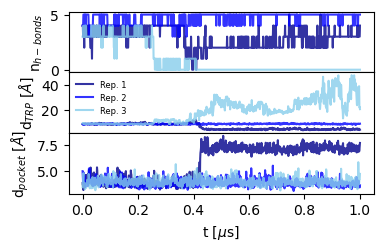

In [8]:
#Plotting

fig, axs = plt.subplots(3,1,sharex=True, figsize=(10/2.54, 6/2.54))
fig.subplots_adjust(hspace=0)

colors=["darkblue", "blue", "skyblue"]
i=0
for hbonds in [hbonds1, hbonds2, hbonds3]:
    hbonds=np.array(hbonds)
    axs[0].plot(hbonds[:,0]*10**-6, hbonds[:,1], color=colors[i], alpha=0.8)
    i+=1
axs[0].legend(fontsize=10, frameon=False)
axs[0].set_ylabel(r"n$_{h-bonds}$")
axs[0].grid(False)

i=0
for d_trp in [d_trp1, d_trp2, d_trp3]:
    axs[1].plot(d_trp[:,0]*10**-6, d_trp[:,1], color=colors[i], label="Rep. "+str(i+1), alpha=0.8)
    i+=1
axs[1].legend(fontsize=6, frameon=False, loc="upper left")
axs[1].set_ylabel(r"d$_{TRP}$ $[\AA]$")
axs[1].grid(False)

i=0
for d_open in [d_open1, d_open2, d_open3]:
    axs[2].plot(d_open[:,0]*10**-6, d_open[:,1], color=colors[i], alpha=0.8)
    i+=1
axs[2].legend(fontsize=6, frameon=False, loc="upper left")
axs[2].set_ylabel(r"d$_{pocket}$ $[\AA]$")
axs[2].grid(False)

axs[2].set_xlabel(r"t [$\mu$s]")

plot_name="WT_LIR_binding.png"

plt.savefig(plot_name, dpi=1200, bbox_inches="tight")
try:
    plt.savefig(plot_name.replace(".png",".pdf"), dpi=1200, bbox_inches="tight")
except:
    pass
plt.show(block=False)

#Writing to csv file

i=0
names=['n_h-bonds_R1', 'n_h-bonds_R2', 'n_h-bonds_R3', 'd_TRP_R1 [A]', 'd_TRP_R2 [A]', 'd_TRP_R3 [A]', 'd_pocket_R1 [A]', 'd_pocket_R2 [A]', 'd_pocket_R3 [A]']
for timeseries in [hbonds1, hbonds2, hbonds3, d_trp1, d_trp2, d_trp3, d_open1, d_open2, d_open3]:
    if i==0:
        data_to_write=timeseries
    else:
        data_to_write=np.hstack((data_to_write, np.transpose([np.array(timeseries)[:,1]])))
    i+=1
np.savetxt("WT_LIR_binding_textfile.csv", data_to_write, delimiter=',', header="time [ps],"+",".join(names))

LIR interactions - LIR mutant

In [9]:
#Inputs

gro1="../../04_LIR_mutant/01_Replica_1/03_EQ_prod/init.c_pbc.gro"
gro2="../../04_LIR_mutant/02_Replica_2/03_EQ_prod/init.c_pbc.gro"
gro3="../../04_LIR_mutant/03_Replica_3/03_EQ_prod/init.c_pbc.gro"

xtc1="../../04_LIR_mutant/01_Replica_1/03_EQ_prod/trjcat_1_to_17.c_pbc_dt1000.xtc"
xtc2="../../04_LIR_mutant/02_Replica_2/03_EQ_prod/trjcat_1_to_18.c_pbc_dt1000.xtc"
xtc3="../../04_LIR_mutant/03_Replica_3/03_EQ_prod/trjcat_1_to_18.c_pbc_dt1000.xtc"

#Main

hbond_sel1="bynum 2020:2128" #WIPI2d residues 129 to 134
hbond_sel2="bynum 5665:5726" #NIX_W36A residues 35 to 39

hbonds1=calc_h_bonds(mda.Universe(gro1, xtc1), hbond_sel1, hbond_sel2)
hbonds2=calc_h_bonds(mda.Universe(gro2, xtc2), hbond_sel1, hbond_sel2)
hbonds3=calc_h_bonds(mda.Universe(gro3, xtc3), hbond_sel1, hbond_sel2)

trpsel="bynum 5676:5685 and not type H" #NIX_W36A A36
casel="bynum 1838" #CA of WIPI2d L119

d_trp1=calc_dist(mda.Universe(gro1, xtc1), trpsel, casel)
d_trp2=calc_dist(mda.Universe(gro2, xtc2), trpsel, casel)
d_trp3=calc_dist(mda.Universe(gro3, xtc3), trpsel, casel)

sel1open="bynum 2602:2621 and not type H and not name CA C O N" #Sidechain of WIPI2d I133
sel2open="bynum 2086:2104 and not type H and not name CA C O N" #Sidechain of WIPI2d F169

d_open1=calc_dist(mda.Universe(gro1, xtc1), sel1open, sel2open)
d_open2=calc_dist(mda.Universe(gro2, xtc2), sel1open, sel2open)
d_open3=calc_dist(mda.Universe(gro3, xtc3), sel1open, sel2open)

Calculating SB distance between <Residue ALA, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue ALA, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue ALA, 100007> and <Residue LEU, 119>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.
Calculating SB distance between <Residue PHE, 169> and <Residue ILE, 133>.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


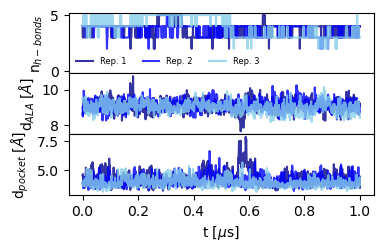

In [10]:
#Plotting

fig, axs = plt.subplots(3,1,sharex=True, figsize=(10/2.54, 6/2.54))
fig.subplots_adjust(hspace=0)

colors=["darkblue", "blue", "skyblue"]
i=0
for hbonds in [hbonds1, hbonds2, hbonds3]:
    hbonds=np.array(hbonds)
    axs[0].plot(hbonds[:,0]*10**-6, hbonds[:,1], color=colors[i], alpha=0.8, label="Rep. "+str(i+1))
    i+=1
axs[0].legend(fontsize=6, frameon=False, loc="lower left", ncols=3)
axs[0].set_ylim([-0.2, 5.2])
axs[0].set_ylabel(r"n$_{h-bonds}$")
axs[0].grid(False)

i=0
for d_trp in [d_trp1, d_trp2, d_trp3]:
    axs[1].plot(d_trp[:,0]*10**-6, d_trp[:,1], color=colors[i], alpha=0.8)
    i+=1
axs[1].legend(fontsize=6, frameon=False, loc="upper left")
axs[1].set_ylabel(r"d$_{ALA}$ $[\AA]$")
axs[1].grid(False)

i=0
for d_open in [d_open1, d_open2, d_open3]:
    axs[2].plot(d_open[:,0]*10**-6, d_open[:,1], color=colors[i], alpha=0.8)
    i+=1
axs[2].legend(fontsize=6, frameon=False, loc="upper left")
axs[2].set_ylabel(r"d$_{pocket}$ $[\AA]$")
axs[2].grid(False)

axs[2].set_xlabel(r"t [$\mu$s]")

plot_name="Mutant_LIR_binding.png"

plt.savefig(plot_name, dpi=1200, bbox_inches="tight")
try:
    plt.savefig(plot_name.replace(".png",".pdf"), dpi=1200, bbox_inches="tight")
except:
    pass
plt.show(block=False)

#Writing to csv file

i=0
names=['n_h-bonds_R1', 'n_h-bonds_R2', 'n_h-bonds_R3', 'd_TRP_R1 [A]', 'd_TRP_R2 [A]', 'd_TRP_R3 [A]', 'd_pocket_R1 [A]', 'd_pocket_R2 [A]', 'd_pocket_R3 [A]']
for timeseries in [hbonds1, hbonds2, hbonds3, d_trp1, d_trp2, d_trp3, d_open1, d_open2, d_open3]:
    if i==0:
        data_to_write=timeseries
    else:
        data_to_write=np.hstack((data_to_write, np.transpose([np.array(timeseries)[:,1]])))
    i+=1
np.savetxt("Mutant_LIR_binding_textfile.csv", data_to_write, delimiter=',', header="time [ps],"+",".join(names))